In [41]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
# shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

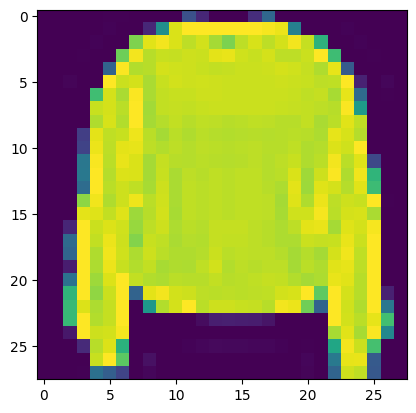

In [12]:
plt.imshow(train_data[7  ])

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Coat')

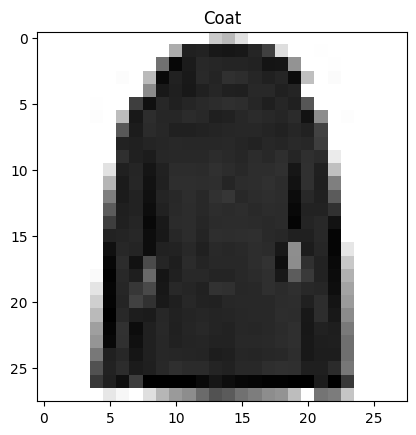

In [20]:
index=2000

plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

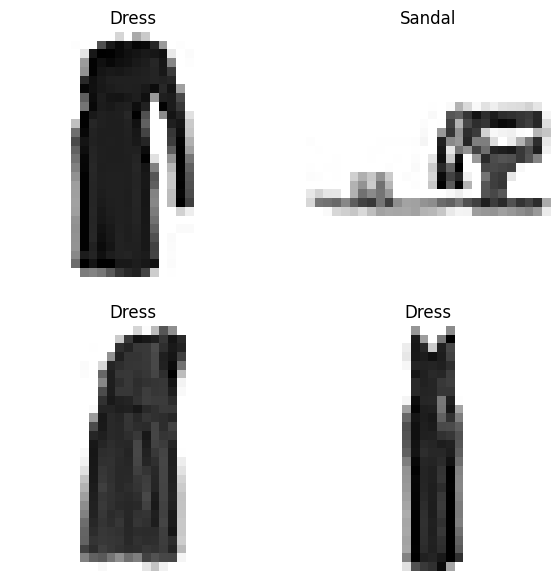

In [27]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Building a model

In [32]:
# input shape is 28/28  -- see flatten layer
# output is 10 (one per class)
#loss funcrtion tf.keras.losses.CategoricalCrossentropy() if values one_hot encoded   SparseCategoricalCrossentropy  if integer
# output layer activation Softmax not sigmoid

In [31]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
])
flatten_model.output_shape

(None, 784)

In [38]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history_11 = model_11.fit(
    train_data, train_labels, epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1793 - loss: 2.1874 - val_accuracy: 0.2937 - val_loss: 1.7877
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3182 - loss: 1.6545 - val_accuracy: 0.3884 - val_loss: 1.3745
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4359 - loss: 1.3352 - val_accuracy: 0.4807 - val_loss: 1.2482
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5398 - loss: 1.1927 - val_accuracy: 0.5690 - val_loss: 1.0398
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5736 - loss: 1.0777 - val_accuracy: 0.6151 - val_loss: 0.9747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6194 - loss: 0.9602 - val_accuracy: 0.5938 - val_loss: 0.9787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6265 - loss: 0.9256 - val_accuracy: 0.6409 - val_loss: 0.9075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6281 - loss: 0.9289 -

In [34]:
model_11.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

#Neural networks prefer to be scaled or normalized

We can normalize the data by dividing by train_data.max() 

In [36]:
test_data.min(), test_data.max()

(np.uint8(0), np.uint8(255))

In [35]:
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [37]:
train_data_norm = train_data /  train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [39]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history_12 = model_12.fit(
    train_data_norm, train_labels, epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4389 - loss: 1.4788 - val_accuracy: 0.7366 - val_loss: 0.8454
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7445 - loss: 0.8082 - val_accuracy: 0.7592 - val_loss: 0.7501
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7618 - loss: 0.7291 - val_accuracy: 0.7692 - val_loss: 0.7067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7702 - loss: 0.6872 - val_accuracy: 0.7812 - val_loss: 0.6639
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7905 - loss: 0.6279 - val_accuracy: 0.7967 - val_loss: 0.6232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7994 - loss: 0.5933 - val_accuracy: 0.8039 - val_loss: 0.6019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8051 - loss: 0.5739 - val_accuracy: 0.8068 - val_loss: 0.5920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8095 - loss: 0.5608 - 

<Axes: title={'center': 'normalized Data'}>

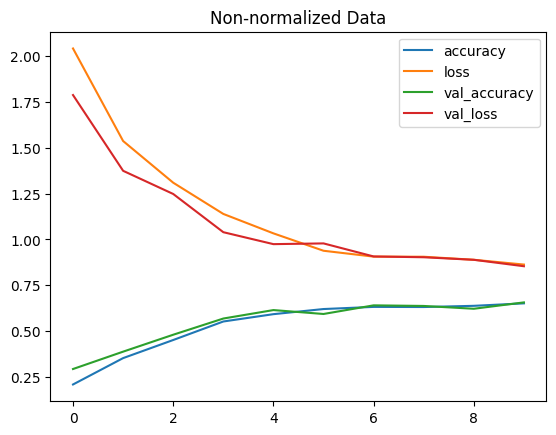

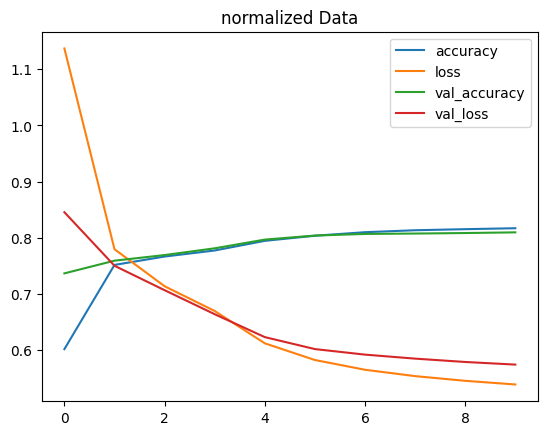

In [44]:
pd.DataFrame(non_norm_history_11.history).plot(title='Non-normalized Data')
pd.DataFrame(norm_history_12.history).plot(title='normalized Data')

In [43]:
type(non_norm_history_11)

keras.src.callbacks.history.History